In [1]:
from sklearn.datasets import load_files
import numpy as np

train_dir = 'E:/Python/fruits-360/Training'
test_dir = 'E:/Python/fruits-360/Test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)
print('Loading complete!')

print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])

Loading complete!
Training set size :  30016
Testing set size :  10067


In [2]:
no_of_classes = len(np.unique(y_train))
no_of_classes

60

In [3]:
print(y_train[0:10])

[58 36  6 24 26 25  0 20 54 43]


In [4]:
#Chuyển đổi vector (Số nguyên) thành ma trận nhị phân
from keras.utils import np_utils #High-Level
import tensorflow as tf #Low-Level => Backend
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_train[0]

Using TensorFlow backend.
C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [5]:
x_test,x_valid = x_test[7000:],x_test[:7000]
y_test,y_vaild = y_test[7000:],y_test[:7000]
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Vaildation X :  (7000,)
Vaildation y : (7000, 60)
Test X :  (3067,)
Test y :  (3067, 60)


In [6]:
x_train[0]

'E:/Python/fruits-360/Training\\Peach Flat\\150_100.jpg'

In [7]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training set shape :  (30016, 100, 100, 3)
Validation set shape :  (7000, 100, 100, 3)
Test set shape :  (3067, 100, 100, 3)
1st training image shape  (100, 100, 3)


In [8]:
print('1st training image as array',x_train[0])

1st training image as array [[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


In [9]:
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

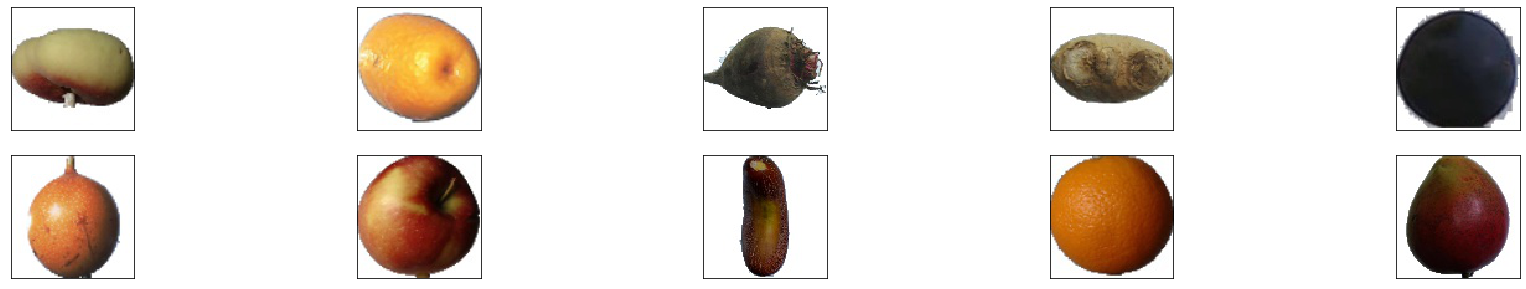

In [10]:
import matplotlib.pyplot as plt # Hổ trợ đồ thị

fig = plt.figure(figsize =(30,5)) # Kích thước rộng,cao
for i in range(10): # 10 ảnh
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i])) #Loại bỏ những ảnh bị lập

In [11]:
# Model Sequential
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
# Xử lý ảnh + tạo thêm data train
from keras.preprocessing.image import ImageDataGeneratorr
from keras.callbacks import ModelCheckpoint
from keras import backend as K

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same')) # padding = 1
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2)) #Lấy max 2*2

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))

model.add(Dropout(0.4))
model.add(Dense(60,activation = 'softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      208       
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)      

In [12]:
model.compile(loss='categorical_crossentropy', #Phân loại nhiều class
              optimizer='rmsprop', # Thuật toán Rmrprop
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [13]:
batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'baocao_fruits.hdf5', verbose = 1, save_best_only = True) # Lưu model sau mỗi epoch

history = model.fit(x_train,y_train,
        batch_size = 32, # 32 ảnh 
        epochs=30, #Số lần duyệt qua hết các ảnh
        #1 epochs = Tổng hình/ batch_size = Số lần lập trong 1 epoch
        validation_data=(x_valid, y_vaild),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)


Train on 30016 samples, validate on 7000 samples
Epoch 1/30
 - 160s - loss: 0.8997 - accuracy: 0.7415 - val_loss: 0.3259 - val_accuracy: 0.9046

Epoch 00001: val_loss improved from inf to 0.32591, saving model to baocao_fruits.hdf5
Epoch 2/30
 - 163s - loss: 0.1157 - accuracy: 0.9629 - val_loss: 0.3307 - val_accuracy: 0.9247

Epoch 00002: val_loss did not improve from 0.32591
Epoch 3/30
 - 160s - loss: 0.0680 - accuracy: 0.9789 - val_loss: 0.1976 - val_accuracy: 0.9673

Epoch 00003: val_loss improved from 0.32591 to 0.19755, saving model to baocao_fruits.hdf5
Epoch 4/30
 - 154s - loss: 0.0518 - accuracy: 0.9851 - val_loss: 0.2005 - val_accuracy: 0.9707

Epoch 00004: val_loss did not improve from 0.19755
Epoch 5/30
 - 152s - loss: 0.0415 - accuracy: 0.9875 - val_loss: 0.2381 - val_accuracy: 0.9713

Epoch 00005: val_loss did not improve from 0.19755
Epoch 6/30
 - 149s - loss: 0.0356 - accuracy: 0.9896 - val_loss: 0.2067 - val_accuracy: 0.9713

Epoch 00006: val_loss did not improve from 

In [14]:
model.load_weights('baocao_fruits.hdf5')

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.986305832862854


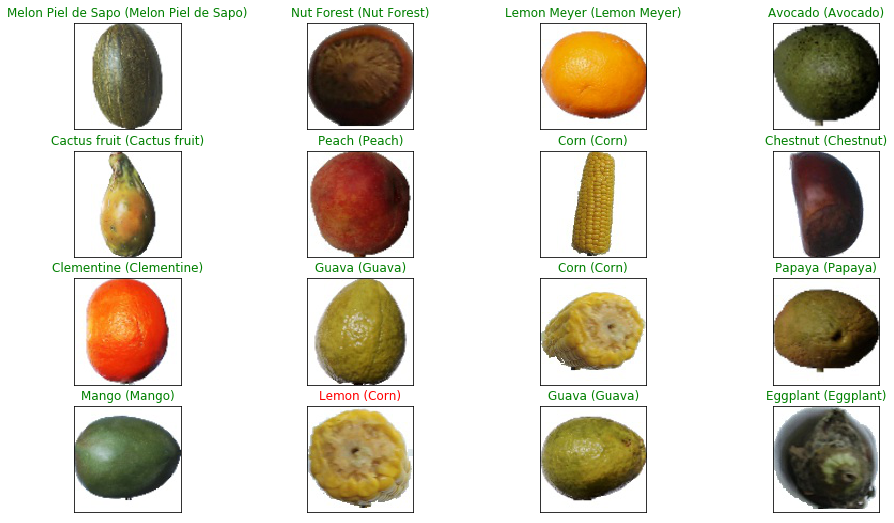

In [20]:
y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9)) #Kích thước hình ảnh
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[]) # 
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

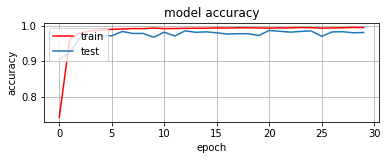

In [33]:
import matplotlib.pyplot as plt 
plt.figure(1)
plt.subplot(211)  
plt.plot(history.history['accuracy'],color="r")  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

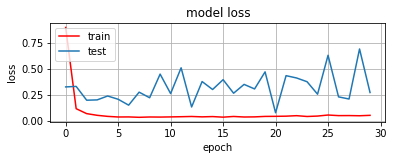

In [32]:
import matplotlib.pyplot as plt 
plt.figure(1)
plt.subplot(212)  
plt.plot(history.history['loss'],color="r")  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.grid()
plt.show()